Train specified model.

LSTM model architecture and design inspired by [Alcantara et al.](https://peerj.com/articles/12752)

# Input parameters here

In [19]:
# # PARAMETERS # # 
BASE_DIR = '/content/drive/My Drive/CS230_FinalReport/' # your base directory
EXP_TYPE = 'with_physicsinputs'

# Hyperparameters:
LSTM_NODES = 64
DROPOUT_RATE = 0.5
LEARNING_RATE = 0.01
GRAD_LOSS_ALPHA = 0.4

MASK_VALUE = 999.
MAX_TIMESTEPS = 67
if EXP_TYPE == 'with_physicsinputs': NUM_INPUT_FEATS = 42
if EXP_TYPE == 'without_physicsinputs': NUM_INPUT_FEATS = 34
NUM_OUTPUT_FEATS = 16
MODEL_FILENAME = '/content/drive/My Drive/CS230_FinalReport/models/' + EXP_TYPE # where you want to save the model to
BATCH_SIZE = 32
EPOCHS = 100

SEED = 43
# # # # # # # # # # 

# Load libraries and data

In [20]:
# Mount Drive to access data.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
# Library imports
import matplotlib.pyplot as plt
import tensorflow as tf
import scipy.io as sio
import numpy as np
import os

# To import own model modules
import sys
sys.path.insert(0, (os.path.join(BASE_DIR, 'src/models')))
from train_model_utils import *

In [22]:
# Set the random seed
keras.utils.set_random_seed(SEED)

In [23]:
# Load in train, dev, arrays.
datadir = os.path.join(BASE_DIR, 'data', 'processed', 'normalized')

X_train = np.load(file=os.path.join(datadir, EXP_TYPE, 'X_train_norm.npy'), allow_pickle=True)
Y_train = np.load(file=os.path.join(datadir, EXP_TYPE, 'Y_train_norm.npy'), allow_pickle=True)
X_dev = np.load(file=os.path.join(datadir, EXP_TYPE, 'X_dev_norm.npy'), allow_pickle=True)
Y_dev = np.load(file=os.path.join(datadir, EXP_TYPE, 'Y_dev_norm.npy'), allow_pickle=True)

# Check sizes
print(f"X_train len: {X_train.shape[0]}")
print(f"X_dev len: {X_dev.shape[0]}")

X_train len: 5949
X_dev len: 820


# Train the model

In [24]:
# Call build model with selected parameters.

model = build_model(
    NUM_TIMESTEPS = MAX_TIMESTEPS,
    NUM_INPUT_FEATS = NUM_INPUT_FEATS,
    NUM_OUTPUT_FEATS = NUM_OUTPUT_FEATS,
    MASK_VALUE = MASK_VALUE,
    lstm_nodes = LSTM_NODES,
    lstm_act = 'tanh',
    dropout_rate = DROPOUT_RATE,
    dense_act = 'linear',
    learning_rate = LEARNING_RATE,
    loss = weighted_grad_loss(GRAD_LOSS_ALPHA,(1-GRAD_LOSS_ALPHA)),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
    )

# Print a summary of the model's layers and all the parameters.
model.summary()

Model: "LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 67, 42)]          0         
                                                                 
 masking_2 (Masking)         (None, 67, 42)            0         
                                                                 
 bidirectional_2 (Bidirectio  (None, 67, 64)           54784     
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 67, 64)            0         
                                                                 
 dense_2 (Dense)             (None, 67, 16)            1040      
                                                                 
Total params: 55,824
Trainable params: 55,824
Non-trainable params: 0
__________________________________________________________

In [25]:
# Train the model, and get the fit history.

fit_history = train_model(model,
                          MODEL_FILENAME,
                          X_train, Y_train,
                          X_dev, Y_dev,
                          use_earlystopping = False,
                          shuffle = True,
                          epochs = EPOCHS,
                          batch_size = BATCH_SIZE)

# Save fit history.
np.save(os.path.join(MODEL_FILENAME, 'fit_history.npy'), fit_history.history)

Epoch 1/100
185/186 [============================>.] - ETA: 0s - loss: 0.0702 - root_mean_squared_error: 0.5397
Epoch 1: val_loss improved from inf to 0.07642, saving model to /content/drive/My Drive/CS230_FinalReport/models/with_physicsinputs


186/186 [==============================] - 22s 117ms/step - loss: 0.0702 - root_mean_squared_error: 0.5395 - val_loss: 0.0764 - val_root_mean_squared_error: 0.5806
Epoch 2/100
185/186 [============================>.] - ETA: 0s - loss: 0.0567 - root_mean_squared_error: 0.4825
Epoch 2: val_loss improved from 0.07642 to 0.07563, saving model to /content/drive/My Drive/CS230_FinalReport/models/with_physicsinputs


186/186 [==============================] - 23s 126ms/step - loss: 0.0567 - root_mean_squared_error: 0.4824 - val_loss: 0.0756 - val_root_mean_squared_error: 0.5775
Epoch 3/100
186/186 [==============================] - ETA: 0s - loss: 0.0535 - root_mean_squared_error: 0.4683
Epoch 3: val_loss improved from 0.07563 to 0.07464, saving model to /content/drive/My Drive/CS230_FinalReport/models/with_physicsinputs


186/186 [==============================] - 22s 120ms/step - loss: 0.0535 - root_mean_squared_error: 0.4683 - val_loss: 0.0746 - val_root_mean_squared_error: 0.5733
Epoch 4/100
185/186 [============================>.] - ETA: 0s - loss: 0.0520 - root_mean_squared_error: 0.4609
Epoch 4: val_loss improved from 0.07464 to 0.07180, saving model to /content/drive/My Drive/CS230_FinalReport/models/with_physicsinputs


186/186 [==============================] - 22s 121ms/step - loss: 0.0519 - root_mean_squared_error: 0.4609 - val_loss: 0.0718 - val_root_mean_squared_error: 0.5620
Epoch 5/100
185/186 [============================>.] - ETA: 0s - loss: 0.0510 - root_mean_squared_error: 0.4563
Epoch 5: val_loss did not improve from 0.07180
186/186 [==============================] - 8s 42ms/step - loss: 0.0510 - root_mean_squared_error: 0.4562 - val_loss: 0.0754 - val_root_mean_squared_error: 0.5767
Epoch 6/100
185/186 [============================>.] - ETA: 0s - loss: 0.0501 - root_mean_squared_error: 0.4522
Epoch 6: val_loss did not improve from 0.07180
186/186 [==============================] - 8s 42ms/step - loss: 0.0501 - root_mean_squared_error: 0.4522 - val_loss: 0.0728 - val_root_mean_squared_error: 0.5663
Epoch 7/100
186/186 [==============================] - ETA: 0s - loss: 0.0495 - root_mean_squared_error: 0.4494
Epoch 7: val_loss did not improve from 0.07180
186/186 [==========================

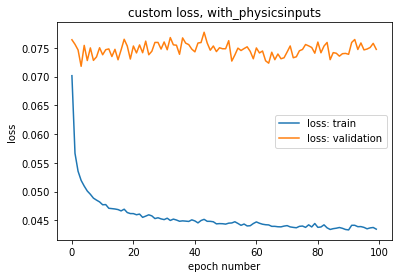

In [26]:
# Plot train/validation loss across epochs.

plot_title = ('custom loss, ' + EXP_TYPE)
save_dir = os.path.join(BASE_DIR, 'reports', 'figures', EXP_TYPE, 'custom_loss_training_loss.png')

plt.plot(fit_history.history['loss'], label='loss: train')
plt.plot(fit_history.history['val_loss'], label='loss: validation')
plt.ylabel('loss')
plt.xlabel('epoch number')
plt.title(plot_title)
plt.legend()
plt.savefig(save_dir)

plt.show()

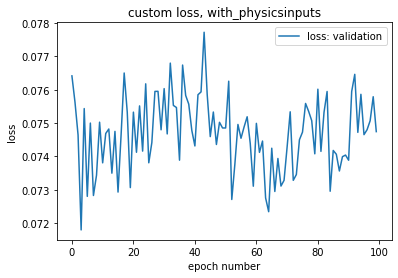

In [27]:
plt.plot(fit_history.history['val_loss'], label='loss: validation')
plot_title = ('custom loss, ' + EXP_TYPE)
save_dir = os.path.join(BASE_DIR, 'reports', 'figures', EXP_TYPE, 'custom_loss_training_loss_validationloss.png')

plt.ylabel('loss')
plt.xlabel('epoch number')
plt.title(plot_title)
plt.legend()
plt.savefig(save_dir)

plt.show()